# Summary

In this Jupyter Notebook xarray and opendap are used to access [National Data Buoy Center](https://www.ndbc.noaa.gov/) data to compare waves on the east vs. west coast (Southern California) of the US during the recent El Nino-fueled winter of 2023/2024. I do this using the following metrics:
1. Significant Wave Height ($H_{1/3}$)
2. Dominant wave period ($\tau$)
3. Wave energy flux ($c_g\left<E\right>$)

### Import Modules

If using Google Colab uncomment and run the next cell otherwise skip over to the next cell.

In [ ]:
# !pip install xarray
# !pip install netcdf4
# !pip install thredds_crawler

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import urllib, requests
import matplotlib.pyplot as plt
from thredds_crawler.crawl import Crawl

## Buoy Locations

To compare East coast vs. Southern California:
## East Coast
1. North Carolina, Northern Outer Banks: NDBC 44095 Oregon Inlet
2. Rhode Island: NDBC 44097 Block Island
## Southern California
1. California, San Diego: NDBC 46258 Mission Bay West
2. Califirnoa, Los Angeles: NDBC 46221 Santa Monica Bay

In [3]:
buoys = ['44095', '44097', '46258', '46221']
station_name = ['Oregon Inlet (NC)', 'Block Island (RI)',
                'Mission Bay West (CA)', 'Santa Monica Bay (CA)']

### Opendap URLs

The NDBC [opendap catalog](https://dods.ndbc.noaa.gov/thredds/catalog/data/stdmet/catalog.html) has opendap links for buoys by station.  We can look at the last 45 days of standard meteorology (stdmet) hourly data using the '{station}h9999.nc' files.

In [4]:
opendap_base = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'
urls = [f"{opendap_base}{n}/{n}h9999.nc" for n in buoys]
urls

['https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44095/44095h9999.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44097/44097h9999.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46258/46258h9999.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h9999.nc']

## Xarray

In [5]:
var_names = [f"ds_{n}" for n in buoys]
datasets = {}
nbuoys = len(buoys)
for n in range(nbuoys):
  datasets[var_names[n]] = xr.open_dataset(urls[n])

In [6]:
datasets

{'ds_44095': <xarray.Dataset>
 Dimensions:                  (latitude: 1, longitude: 1, time: 3307)
 Coordinates:
   * latitude                 (latitude) float32 35.75
   * longitude                (longitude) float32 -75.33
   * time                     (time) datetime64[ns] 2023-12-06T00:26:00 ... 20...
 Data variables: (12/13)
     air_pressure             (time, latitude, longitude) float32 ...
     air_temperature          (time, latitude, longitude) float32 ...
     average_wpd              (time, latitude, longitude) timedelta64[ns] ...
     dewpt_temperature        (time, latitude, longitude) float32 ...
     dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
     gust                     (time, latitude, longitude) float32 ...
     ...                       ...
     sea_surface_temperature  (time, latitude, longitude) float32 ...
     visibility               (time, latitude, longitude) float32 ...
     water_level              (time, latitude, longitude

In [7]:
%whos

Variable       Type      Data/Info
----------------------------------
Crawl          type      <class 'thredds_crawler.crawl.Crawl'>
buoys          list      n=4
datasets       dict      n=4
n              int       3
nbuoys         int       4
np             module    <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
opendap_base   str       https://dods.ndbc.noaa.go<...>hredds/dodsC/data/stdmet/
pd             module    <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt            module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
requests       module    <module 'requests' from '<...>es/requests/__init__.py'>
station_name   list      n=4
urllib         module    <module 'urllib' from '/o<...>3.11/urllib/__init__.py'>
urls           list      n=4
var_names      list      n=4
xr             module    <module 'xarray' from '/o<...>ages/xarray/__init__.py'>


In [8]:
# datasets["ds_44095"]
datasets[f"ds_{buoys[0]}"]

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 3307)
Coordinates:
  * latitude                 (latitude) float32 35.75
  * longitude                (longitude) float32 -75.33
  * time                     (time) datetime64[ns] 2023-12-06T00:26:00 ... 20...
Data variables: (12/13)
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    gust                     (time, latitude, longitude) float32 ...
    ...                       ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with daily manual QC
    conventions:                     COARDS
    station:                         44095
    comment:                         Oregon Inlet, NC (192)
    location:                        35.750 N 75.330 W 
    DODS_EXTRA.Unlimited_Dimension:  time

### Significant Wave Heights

Text(0.5, 1.0, 'Significant Wave Height')

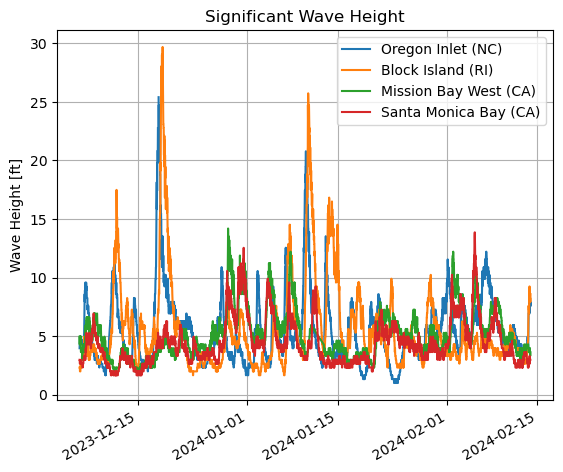

In [9]:
for n in range(nbuoys):
  wave_height = datasets[f"ds_{buoys[n]}"].wave_height*3.3 # ft
  wave_height.squeeze().plot()

plt.grid(True)
plt.legend(station_name)
plt.xlabel('')
plt.ylabel('Wave Height [ft]')
plt.title('Significant Wave Height')

### Dominant Wave Period

Text(0.5, 1.0, 'Dominant Wave Period')

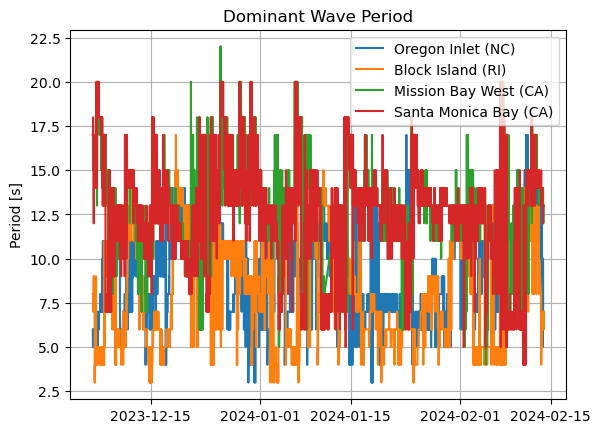

In [10]:
for n in range(nbuoys):
  time = datasets[f"ds_{buoys[n]}"].time
  dominant_wpd = np.array(
      datasets[f"ds_{buoys[n]}"].dominant_wpd.squeeze()
      ).astype(float)/1e9
  indx = np.where(dominant_wpd < 0)[0]
  dominant_wpd[indx] = np.nan
  plt.plot(time, dominant_wpd)

plt.grid(True)
plt.legend(station_name)
plt.xlabel('')
plt.ylabel('Period [s]')
plt.title('Dominant Wave Period')

### Wave Energy Flux

Defined as group velocity, $c_g$, times the total energy averaged over a period/wavelength, $\left<E\right>$:   

$\displaystyle c_g\left<E\right> = \frac{\rho g}{32\pi}\tau H^2_{1/3}$

It is assumed that the waves are deep-water surface gravity waves (SGWs), which have a group velocity that depends on period, which is also conserved for SGWs.  

Text(0.5, 1.0, 'Wave Energy Flux')

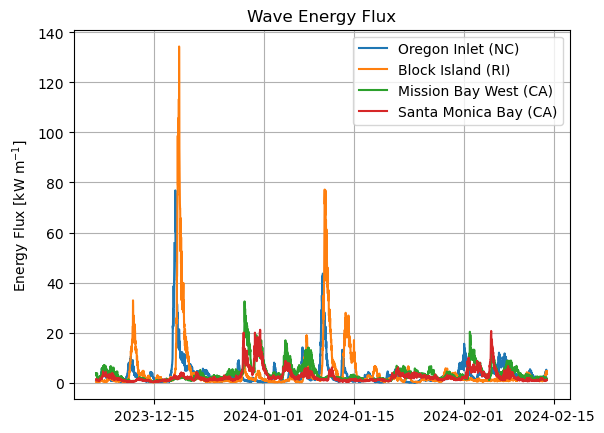

In [11]:
rho = 1e3
g = 9.81
for n in range(nbuoys):
  time = datasets[f"ds_{buoys[n]}"].time
  wave_height = np.array(
      datasets[f"ds_{buoys[n]}"].wave_height.squeeze()
      ).astype(float) # m
  dominant_wpd = np.array(
      datasets[f"ds_{buoys[n]}"].dominant_wpd.squeeze()
      ).astype(float)/1e9
  indx = np.where(dominant_wpd < 0)[0]
  dominant_wpd[indx] = np.nan
  Eflux = rho*g/(32*np.pi)*dominant_wpd*(wave_height)**2
  plt.plot(time, Eflux/1e3)

plt.grid(True)
plt.legend(station_name)
plt.xlabel('')
plt.ylabel('Energy Flux [kW m$^{-1}$]')
plt.title('Wave Energy Flux')

Combine all three into one figure

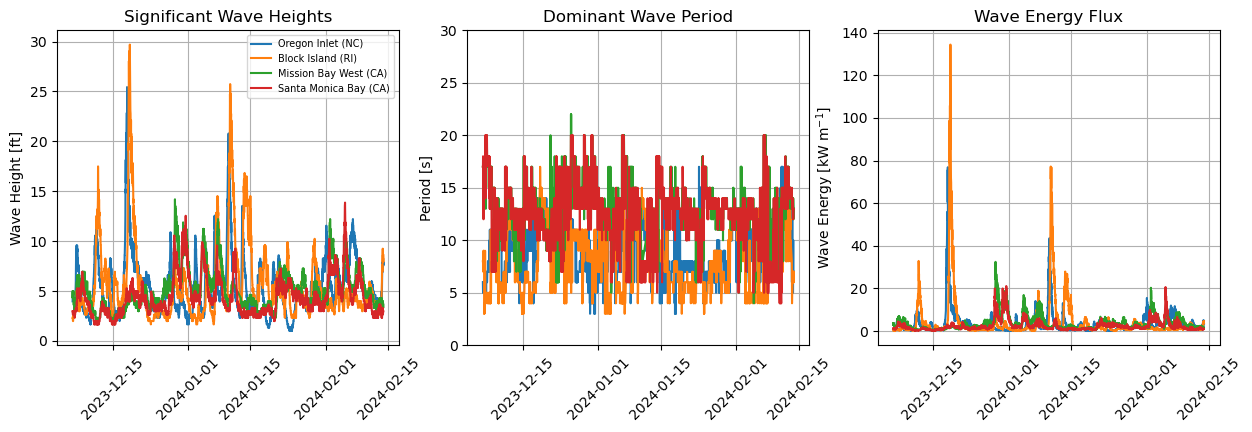

In [12]:
plt.rcParams['figure.figsize'] = (15, 9)

for n in range(nbuoys):
  time = datasets[f"ds_{buoys[n]}"].time
  wave_height = np.array(
      datasets[f"ds_{buoys[n]}"].wave_height.squeeze()
      ).astype(float) # m
  dominant_wpd = np.array(
      datasets[f"ds_{buoys[n]}"].dominant_wpd.squeeze()
      ).astype(float)/1e9
  indx = np.where(dominant_wpd < 0)[0]
  dominant_wpd[indx] = np.nan
  Eflux = rho*g/(32*np.pi)*dominant_wpd*(wave_height)**2
  plt.subplot(231)
  plt.plot(time, wave_height*3.3)

  plt.subplot(232)
  plt.plot(time, dominant_wpd)

  plt.subplot(233)
  plt.plot(time, Eflux/1e3)

plt.subplot(231)
plt.legend(station_name, fontsize=7)
plt.xticks(rotation=45)
plt.ylabel('Wave Height [ft]')
plt.title('Significant Wave Heights')
plt.grid(True)

plt.subplot(232)
plt.ylim(0, 30)
plt.xticks(rotation=45)
plt.ylabel('Period [s]')
plt.title('Dominant Wave Period')
plt.grid(True)

plt.subplot(233)
plt.xticks(rotation=45)
plt.ylabel('Wave Energy [kW m$^{-1}$]')
plt.title('Wave Energy Flux')
plt.grid(True)